# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

pulledCities = [];   country = []
lat = [];            lon = []
temp = [];           humidity = []
cloudiness = [];     windSpeed = []


for city in cities:
    response = requests.get(query_url + city).json()
    try:
        pulledCities.append(response['name'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        country.append((response['sys']['country']))
    except (KeyError, IndexError):
        pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
weather_df = pd.DataFrame({
    "City":pulledCities,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature (F)":temp,
    "Humidity (%)":humidity,
    "Cloudiness (%)":cloudiness,
    "Wind Speed (mph)": windSpeed
})
weather_df.head()

weather_df.to_csv(output_data_file, index=False, header=True)


In [60]:
weather_df

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Glens Falls,US,43.31,-73.64,74.93,33,1,6.93
1,Alice Springs,AU,-23.70,133.88,41.00,44,0,2.24
2,Bengkulu,ID,-3.80,102.27,78.53,88,100,6.02
3,Omboué,GA,-1.57,9.26,76.41,83,79,8.55
4,Saint-Philippe,RE,-21.36,55.77,60.87,64,90,10.29
...,...,...,...,...,...,...,...,...
518,Kwang Binh,VN,17.48,106.60,80.96,77,63,7.34
519,Tavricheskoye,RU,54.59,73.64,62.60,39,8,6.71
520,Saquena,PE,-4.67,-73.52,83.41,75,37,2.71
521,Samarai,PG,-10.62,150.67,79.61,82,98,19.39


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [37]:
def Scatter_Lattitude(weather_df, para_1, para_2):
    plt.scatter(weather_df[para_1],weather_df[para_2])
    plt.title('Latitude vs.' + para_2)
    plt.xlabel(para_1,fontsize=12);
    plt.ylabel(para_2,fontsize=12);
    plt.tight_layout();
    lat_output_plot = '../output_data/'+para_1+'_'+para_2 +'.png'
    plt.savefig(lat_output_plot, dpi=300,bbox_inches='tight')

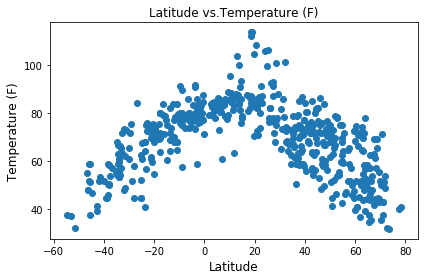

In [38]:
para_1 = "Latitude"
para_2 = 'Temperature (F)'
Scatter_Lattitude(weather_df, para_1, para_2)

#### Latitude vs. Humidity Plot

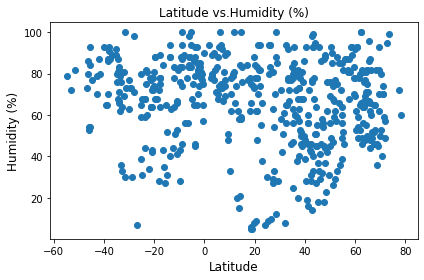

In [39]:
para_1 = "Latitude"
para_2 = 'Humidity (%)'
Scatter_Lattitude(weather_df, para_1, para_2)

#### Latitude vs. Cloudiness Plot

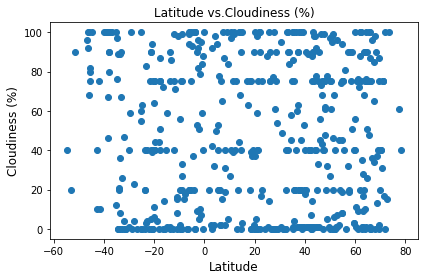

In [42]:
para_1 = "Latitude"
para_2 = 'Cloudiness (%)'
Scatter_Lattitude(weather_df, para_1, para_2)

#### Latitude vs. Wind Speed Plot

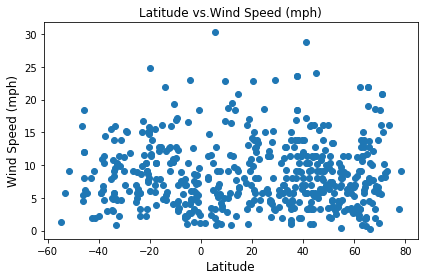

In [40]:
para_1 = "Latitude"
para_2 = 'Wind Speed (mph)'
Scatter_Lattitude(weather_df, para_1, para_2)

## Linear Regression

In [43]:
# Create Northern and Southern Hemisphere DataFrames
df_north = weather_df[weather_df['Latitude'] > 0]
df_south = weather_df[weather_df['Latitude'] < 0]

In [49]:
# OPTIONAL: Create a function to create Linear Regression plots
def scatter_regress(weather_df, para_1, para_2):

    fig = plt.figure(figsize=(7,4))
    plt.scatter(weather_df[para_1],weather_df[para_2], marker=None, color='C0', 
            linewidths=0.3, edgecolors="black")
    plt.title("Latitude vs. " + para_2)
    plt.xlabel(para_1)
    plt.ylabel(para_2)
    plt.grid()
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(weather_df[para_1],weather_df[para_2])
    regress_values = weather_df[para_1] * slope + intercept
    plt.plot(weather_df[para_1],regress_values,"r-")
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    text =(line_eq + ', R$^{2}$ = ' + str(round(rvalue,2)))
    props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.8, edgecolor='none')        
    fig.text(0.15,0.17, text, size=12,bbox=props,fontsize=14,color ='red')
    
    output_plot = '../output_data/'+para_1+'_'+para_2 + "_regression" +'.png'
    plt.savefig(output_plot, dpi=300,bbox_inches='tight')


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

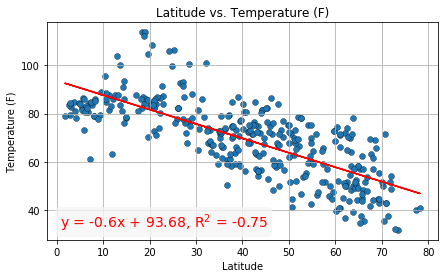

In [50]:
para_1 = "Latitude"
para_2 = 'Temperature (F)'
scatter_regress(df_north, para_1, para_2)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

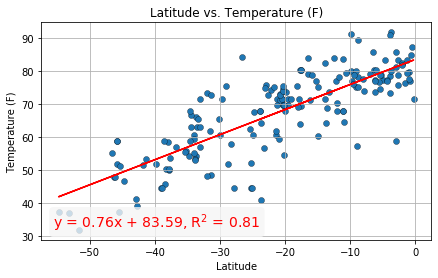

In [51]:
para_1 = "Latitude"
para_2 = 'Temperature (F)'
scatter_regress(df_south, para_1, para_2)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

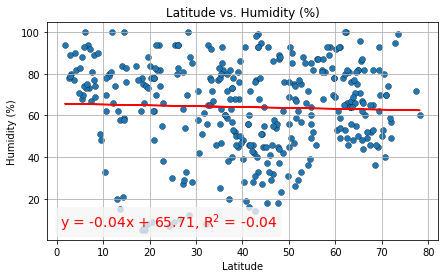

In [52]:
para_1 = "Latitude"
para_2 = 'Humidity (%)'
scatter_regress(df_north, para_1, para_2)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

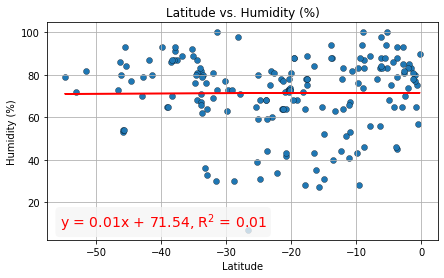

In [53]:
para_1 = "Latitude"
para_2 = 'Humidity (%)'
scatter_regress(df_south, para_1, para_2)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

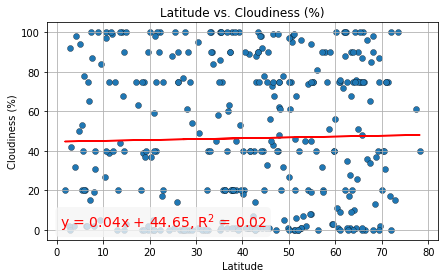

In [54]:
para_1 = "Latitude"
para_2 = 'Cloudiness (%)'
scatter_regress(df_north, para_1, para_2)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

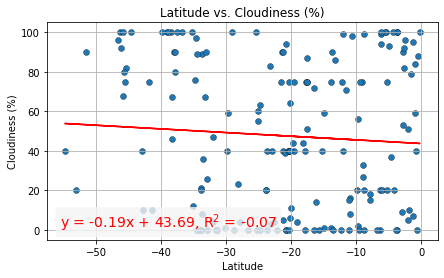

In [55]:
para_1 = "Latitude"
para_2 = 'Cloudiness (%)'
scatter_regress(df_south, para_1, para_2)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

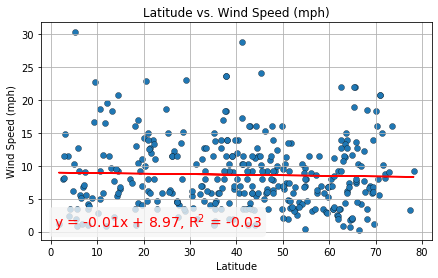

In [56]:
para_1 = "Latitude"
para_2 = 'Wind Speed (mph)'
scatter_regress(df_north, para_1, para_2)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

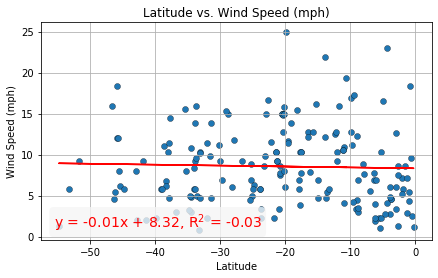

In [57]:
para_1 = "Latitude"
para_2 = 'Wind Speed (mph)'
scatter_regress(df_south, para_1, para_2)